In [240]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [241]:
# Read Data from file
listX1= []
listX2= []
listY= []
with open('ex1data2.txt','r') as data:
    for line in data:
        arr=line.split(",")
        listX1.append(int(arr[0]))
        listX2.append(int(arr[1]))
        listY.append(int(arr[2]))
np_listX1=np.array(listX1)
np_listX2=np.array(listX2)
np_listY=np.array(listY)
print(np_listY)

[399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


In [1]:
#cost function
def cost_function(X,theta,Y):
    m = len(Y)
    J = (1/(2 * m))*np.sum(((np.dot(theta,X)) - Y) ** 2) 
    return J


## Gradient Descent Algorithm for Multivariate Linear Regression

In [243]:
#gradient descent()
def GDA(theta,x,y,lrate):
    a= np.sum((np.dot(x,theta)-y)*x)
    theeta= theta-(lrate/len(y))*(a)
    return theeta

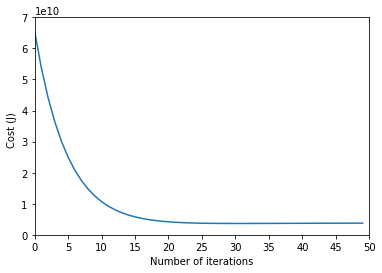

In [244]:
#Feature Normalization
meanX1= np.mean(np_listX1)
meanX2= np.mean(np_listX2)
stdX1= np.std(np_listX1)
np_listX0= np.ones(len(np_listX2))
np_X_normal= np.c_[np_listX0, np_listX1]
np_X_normal= (np.c_[np_X_normal,np_listX2]).T
stdX2= np.std(np_listX2)
np_listX1= (np_listX1 - meanX1)/stdX1
np_listX2= (np_listX2 - meanX2)/stdX2
np.set_printoptions(suppress=True)
np_X= np.c_[np_listX0, np_listX1]
np_X= (np.c_[np_X,np_listX2]).T
np_theeta= np.zeros(np_X.shape[0]);
lrate= 0.095
iterations=0
#Plot customization
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)  ")
plt.xlim(0,50)
plt.xticks(list(range(0,55,5)))
plt.ylim(0,7*10**10)
plt.yticks(list(range(0,8*10**10,10**10)))
x_ax=[]
y_ax=[]

#Running GDA for 50 iterations with learning rate at 0.095
while(iterations<50):
    J1=cost_function(np_X,np_theeta,np_listY)
    for i in range(np_X.shape[0]):
        np_theeta[i]=GDA(np_theeta[i],np_X[i],np_listY,lrate)
    x_ax.append(iterations)
    y_ax.append(J1)
    iterations=iterations+1
plt.plot(x_ax,y_ax)

In [245]:
#Predict price of house with area =1650 (x1)and 3 bedrooms(x2) with x0 =1 (for theeta 0)

#feature scaling
x1= (1650-meanX1)/stdX1
x2= (3-meanX2)/stdX2
print(np_theeta.dot([1,x1,x2]))# with scaling features

278958.36519056855


In [246]:
#Solving using Normal Equations for theta value
a=np_X_normal.dot(np_X_normal.T)
a_inv= np.linalg.inv(a)
np_theeta_normal=a_inv.dot(np_X_normal)
np_theeta_normal= np_theeta_normal.dot(np_listY)

np_theeta_normal.dot([1,1650,3])

293081.46433489426